<div style="border:2px solid black; padding:10px;">
    <h3>Nhóm 15</h3>
    <h1 style='color:red;text-align:center;font-size:30px'>Chủ đề: Phân tích về doanh thu phim<b></b></h1>
</div>


<h3>Danh sách thành viên</h3>
<li> Nguyễn Quốc Hưng - 21120464 </li>
<li> Đoàn Đức Hữu - 21120465 </li>
<li> Võ Minh Khuê - 21120486</li>
<li> Hồ Trọng Lễ - 21120494</li>


<h1 style='color:blue;text-align:center;font-size:30px'><b>Phần I - B. Khám phá - Tiền xử xử lý dữ liệu </b></h1>


# Import thư viện


In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import os
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [242]:
import sys
sys.executable

'c:\\Users\\dhuu2\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

### Đọc file 'boxoffice_1990_2022.csv' vào dataframe df


In [243]:
df = pd.read_csv(
    './boxoffice_crawler/boxoffice_crawler/boxoffice_1990_2022.csv', encoding='latin1')
df.head(20)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,in_release,release_date
0,Thomas and the Magic Railroad,"$15,933,506","$19,748,009",Destination Films,"$4,154,932","2,016",NaN,NaN,"Adventure,Comedy,Drama,Family,Fantasy",159,26/07/2000
1,The Talented Mr. Ripley,"$81,298,265","$128,798,265",Paramount Pictures,"$12,738,237","2,307","$40,000,000",R,"Crime,Drama,Thriller",373,25/12/1999
2,One False Move,"$1,543,112","$1,543,112",IRS Media,"$44,545",5,NaN,R,"Crime,Drama,Thriller",238,08/05/1992
3,C'est la vie,"$805,472","$805,472",The Samuel Goldwyn Company,"$18,749",2,NaN,NaN,"Comedy,Drama,Romance",63,02/11/1990
4,Coupe de Ville,"$715,983","$715,983",Universal Pictures,"$66,871",7,NaN,NaN,"Comedy,Drama",298,09/03/1990
5,Galaxy Quest,"$71,583,916","$90,683,916",DreamWorks Distribution,"$7,012,630","2,412","$45,000,000",PG,"Adventure,Comedy,Sci-Fi",373,25/12/1999
6,Hero,"$53,710,019","$177,395,557",Miramax,"$17,800,000","2,031","$31,000,000",PG-13,"Action,Adventure,Drama",133,27/08/2004
7,Little Nemo: Adventures in Slumberland,"$1,368,000","$1,368,000",Hemdale,"$407,695",579,NaN,NaN,"Adventure,Animation,Comedy,Family,Fantasy,Musical",133,21/08/1992
8,Zebrahead,"$1,557,771","$1,557,771",Triumph Releasing Corporation,"$609,041",251,NaN,R,"Drama,Romance",70,23/10/1992
9,The Phantom of the Opera,"$51,268,815","$154,648,887",Warner Bros.,"$4,001,890",622,"$70,000,000",PG-13,"Drama,Musical,Romance,Thriller",375,22/12/2004


## Khám phá dữ liệu


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [244]:
num_rows, num_cols = df.shape
num_rows, num_cols

(6405, 11)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
- Dựa vào kết quả trên, mỗi dòng thể hiện thông tin chi tiết của các phim trong khoảng thời gian từ năm 1980 đến năm 2022 được thu thập từ trang web Box Office Mojo.
- Không có dòng nào có ý nghĩa khác so với các dòng còn lại.

### Dữ liệu có dòng nào bị lặp không?

In [245]:
duplicated_rows = df[df.duplicated()]
duplicated_nums = duplicated_rows.shape
if duplicated_nums[0] > 0:
    print(f'Có dữ liệu lặp: {duplicated_nums[0]} dòng')
else:
    print('Không có dữ liệu bị lặp')

Có dữ liệu lặp: 487 dòng


Như kết quả trả về cho ta thấy, trong tập dữ liệu này có 487 dòng bị lặp. Vậy phải xử lý các dòng dữ liệu lặp: 

In [246]:
df = df.drop_duplicates()

duplicated_rows = df[df.duplicated()]
duplicated_nums = duplicated_rows.shape
if duplicated_nums[0] > 0:
    print(f'Có dữ liệu lặp: {duplicated_nums[0]} dòng')
else:
    print('Không có dữ liệu bị lặp')

Không có dữ liệu bị lặp


### Ý nghĩa của các cột


In [247]:
schema_data = pd.read_csv(
    "./boxoffice_crawler/boxoffice_crawler/MovieRevenue_schema.csv", encoding='utf-8')
pd.set_option('max_colwidth', 400)
schema_data


,STT,name,meaning
0,1,title,Tựa đề phim
1,2,domestic_revenue,Doanh thu trong nước (USA)
2,3,world_revenue,Doanh thu toàn cầu
3,4,distributor,Nhà phân phối
4,5,opening_revenue,"Doanh thu mở màn, hay còn được gọi là doanh thu đạt được trong tuần đầu tiên"
5,6,opening_theater,Số lượng rạp mà bộ phim được chiếu trong được chiếu trong tuần đầu tiên
6,7,budget,Ngân sách dùng để sản xuất bộ phim
7,8,MPPA,Chỉ số đánh giá cảu Hiệp Hội điện ảnh Hoa Kỳ
8,10,in_release,Số ngày bộ phim được phát hành
9,11,release_date,Ngày phát hành


### Kiểu dữ liệu của các cột


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5918 entries, 0 to 6404
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             5918 non-null   object
 1   domestic_revenue  5918 non-null   object
 2   world_revenue     5918 non-null   object
 3   distributor       5918 non-null   object
 4   opening_revenue   5858 non-null   object
 5   opening_theaters  5851 non-null   object
 6   budget            2944 non-null   object
 7   MPAA              5251 non-null   object
 8   genres            5912 non-null   object
 9   in_release        5916 non-null   object
 10  release_date      5415 non-null   object
dtypes: object(11)
memory usage: 554.8+ KB


## Tiền xử lý

1. **Chuyển đổi các cột chứa số thành kiểu dữ liệu số**: Các cột như `domestic_revenue`, `world_revenue`, `opening_revenue`, `opening_theaters`, `budget`, và `in_release` đều chứa dữ liệu số, nhưng hiện đang được lưu trữ dưới dạng object. Chúng ta sẽ loại bỏ các ký tự không phải số (như dấu `$` và dấu phẩy) và chuyển đổi các cột này thành kiểu dữ liệu số.

2. **Chuyển đổi cột `release_date` thành kiểu dữ liệu datetime**: Điều này sẽ hữu ích cho việc phân tích sau này.


In [249]:
# Remove $ and , in the revenue and budget columns
for col in ['domestic_revenue', 'world_revenue', 'opening_revenue', 'budget']:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)

# Convert columns to numeric type
for col in ['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters', 'budget', 'in_release']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')

In [250]:
df.head(5)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,in_release,release_date
0,Thomas and the Magic Railroad,15933506,19748009,Destination Films,"4,154,932.00",NaN,NaN,NaN,"Adventure,Comedy,Drama,Family,Fantasy",159.00,2000-07-26
1,The Talented Mr. Ripley,81298265,128798265,Paramount Pictures,"12,738,237.00",NaN,"40,000,000.00",R,"Crime,Drama,Thriller",373.00,1999-12-25
2,One False Move,1543112,1543112,IRS Media,"44,545.00",5.00,NaN,R,"Crime,Drama,Thriller",238.00,1992-05-08
3,C'est la vie,805472,805472,The Samuel Goldwyn Company,"18,749.00",2.00,NaN,NaN,"Comedy,Drama,Romance",63.00,1990-11-02
4,Coupe de Ville,715983,715983,Universal Pictures,"66,871.00",7.00,NaN,NaN,"Comedy,Drama",298.00,1990-03-09


### Với mỗi cột có dữ liệu dạng số, các giá trị được phân bố như thế nào?


Với các cột có kiểu dữ liệu số, ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Sau đó lưu kết quả vào DataFrame `num_col_info_df`, trong đó:

- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.


In [251]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate statistics
missing_ratio = df[numeric_cols].isnull().mean() * 100
min_values = df[numeric_cols].min()
lower_quartile = df[numeric_cols].quantile(0.25)
median = df[numeric_cols].median()
upper_quartile = df[numeric_cols].quantile(0.75)
max_values = df[numeric_cols].max()

# Create DataFrame
num_col_info_df = pd.DataFrame({
    'missing_ratio': missing_ratio,
    'min': min_values,
    'lower_quartile': lower_quartile,
    'median': median,
    'upper_quartile': upper_quartile,
    'max': max_values
})

# Round to 1 decimal place
num_col_info_df = num_col_info_df.round(2)
pd.options.display.float_format = '{:10,.2f}'.format
num_col_info_df.T

,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,in_release
missing_ratio,0.00,0.00,1.01,67.34,50.25,0.56
min,"153,504.00","153,504.00","2,515.00",1.00,"15,000.00",21.00
lower_quartile,"6,858,971.25","10,631,912.25","970,951.25",4.00,"18,000,000.00",158.00
median,"21,208,579.00","32,596,692.50","5,812,160.00",19.00,"35,000,000.00",265.00
upper_quartile,"53,657,832.25","96,240,876.50","14,574,818.25",350.00,"70,000,000.00",368.00
max,"936,662,225.00","2,799,439,100.00","357,115,007.00",998.00,"356,000,000.00",996.00


### Với mỗi cột có dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Với các cột "title","distributor","MPAA","genres" ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "genres"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu phẩy)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu)

Lưu kết quả vào DataFrame `cat_col_info_df`, trong đó:

- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.


In [252]:
# Define categorical columns
cat_cols = ["title", "distributor", "MPAA", "genres"]

# Initialize DataFrame to store results
cat_col_info_df = pd.DataFrame(
    index=["missing_ratio", "num_values", "value_ratios"], columns=cat_cols)

for col in cat_cols:
    # Calculate missing ratio
    missing_ratio = df[col].isnull().mean() * 100

    # Calculate number of unique values
    # Split values by comma and flatten the list
    values = [val for sublist in df[col].dropna().str.split(',').tolist()
              for val in sublist]
    num_values = len(set(values))

    # Calculate value ratios
    value_counts = pd.Series(values).value_counts(normalize=True) * 100
    value_ratios = value_counts.sort_values(ascending=False).to_dict()

    # Store results
    cat_col_info_df.at["missing_ratio", col] = missing_ratio
    cat_col_info_df.at["num_values", col] = num_values
    cat_col_info_df.at["value_ratios", col] = value_ratios

# Round to 1 decimal place
cat_col_info_df = cat_col_info_df.applymap(
    lambda x: round(x, 1) if isinstance(x, (int, float)) else x)

cat_col_info_df

C:\Users\dhuu2\AppData\Local\Temp\ipykernel_9928\2806960657.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cat_col_info_df = cat_col_info_df.applymap(


,title,distributor,MPAA,genres
missing_ratio,0.00,0.00,11.30,0.10
num_values,5840,237,8,25
value_ratios,"{'Beauty and the Beast': 0.08358408559010365, 'The Nightmare Before Christmas': 0.06686726847208291, ' Inc.': 0.06686726847208291, 'The Lion King': 0.06686726847208291, 'Ghostbusters': 0.06686726847208291, 'Monsters': 0.05015045135406219, 'Toy Story': 0.05015045135406219, 'Avatar': 0.05015045135406219, 'I': 0.05015045135406219, 'The Addams Family': 0.05015045135406219, 'Jurassic Park': 0.05015...","{'Warner Bros.': 11.118621155795877, 'Universal Pictures': 8.938830686042582, 'Walt Disney Studios Motion Pictures': 8.938830686042582, 'Twentieth Century Fox': 7.6377154444068935, 'Paramount Pictures': 6.67455221358567, 'Sony Pictures Entertainment (SPE)': 6.471781007096992, 'Lions Gate Films': 4.393376140588036, 'Miramax': 3.6329841162554914, 'New Line Cinema': 3.3119297059817505, 'Metro-Gol...","{'R': 44.27728051799657, 'PG-13': 37.66901542563321, 'PG': 16.853932584269664, 'G': 1.0093315558941154, 'NC-17': 0.11426394972386211, 'Not Rated': 0.03808798324128738, 'TV-14': 0.01904399162064369, 'Approved': 0.01904399162064369}","{'Drama': 16.737035834145285, 'Comedy': 13.380967846703475, 'Thriller': 9.137165746454476, 'Action': 8.216953556349464, 'Romance': 7.377936559489011, 'Adventure': 6.755440077947386, 'Crime': 5.965140197033669, 'Fantasy': 4.568582873227238, 'Family': 4.389953448089207, 'Sci-Fi': 3.870304211324023, 'Mystery': 3.8540651726751114, 'Horror': 3.1287214463570425, 'Biography': 2.522464003464328, 'Anim..."


### Xử lý dữ liệu bị thiếu


- Tỷ lệ thiếu dữ liệu của từng cột


In [253]:
df.agg(lambda x: x.isna().mean()*100).sort_values(ascending=False)

opening_theaters        67.34
budget                  50.25
MPAA                    11.27
release_date             8.50
opening_revenue          1.01
in_release               0.56
genres                   0.10
title                    0.00
domestic_revenue         0.00
world_revenue            0.00
distributor              0.00
dtype: float64

In [254]:
# Drop the 'opening_theaters' and 'budget' columns
df = df.drop(['opening_theaters', 'budget'], axis=1)

# Drop rows with missing values
df = df.dropna()

df.agg(lambda x: x.isna().mean()*100).sort_values(ascending=False)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4760 entries, 1 to 6403
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4760 non-null   object        
 1   domestic_revenue  4760 non-null   int64         
 2   world_revenue     4760 non-null   int64         
 3   distributor       4760 non-null   object        
 4   opening_revenue   4760 non-null   float64       
 5   MPAA              4760 non-null   object        
 6   genres            4760 non-null   object        
 7   in_release        4760 non-null   float64       
 8   release_date      4760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 371.9+ KB


(4760, 9)

## Trực quan hóa và thống kê dữ liệu


c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


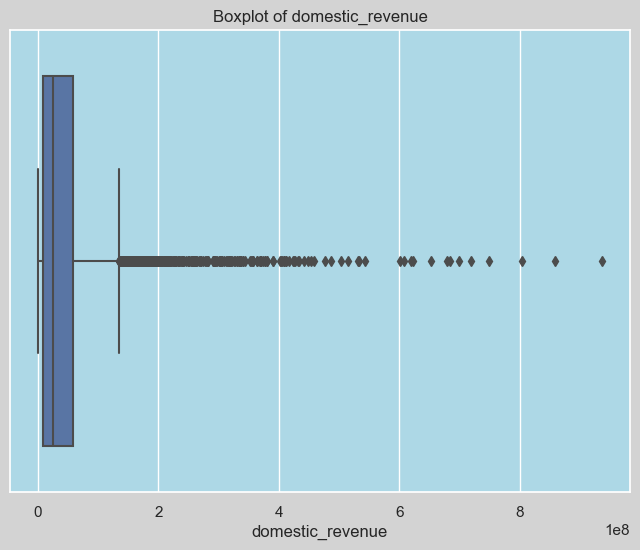

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


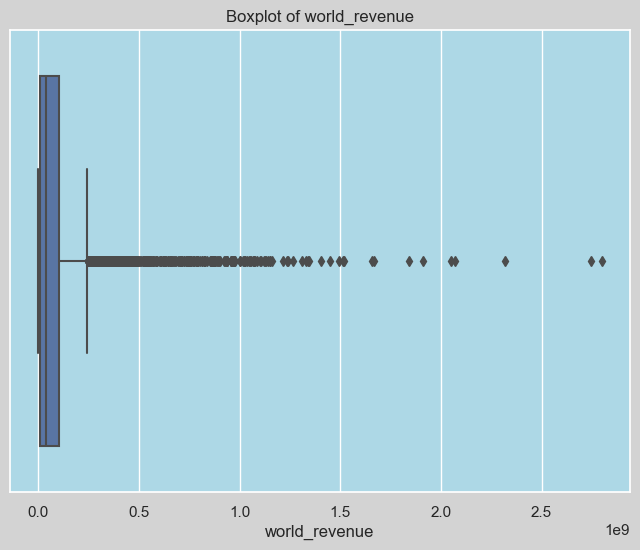

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


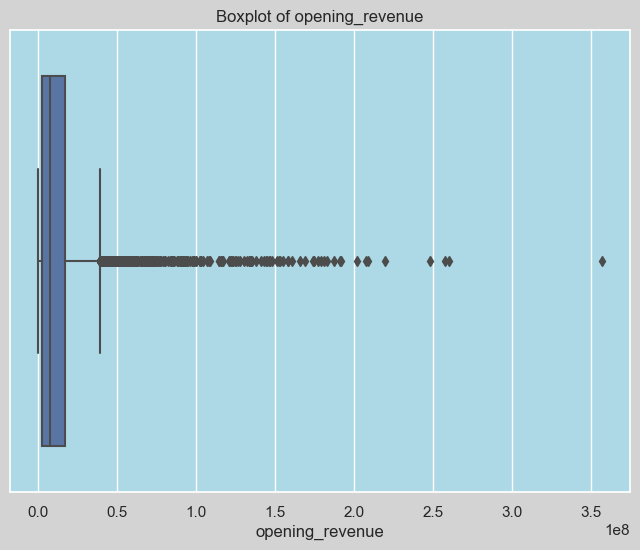

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


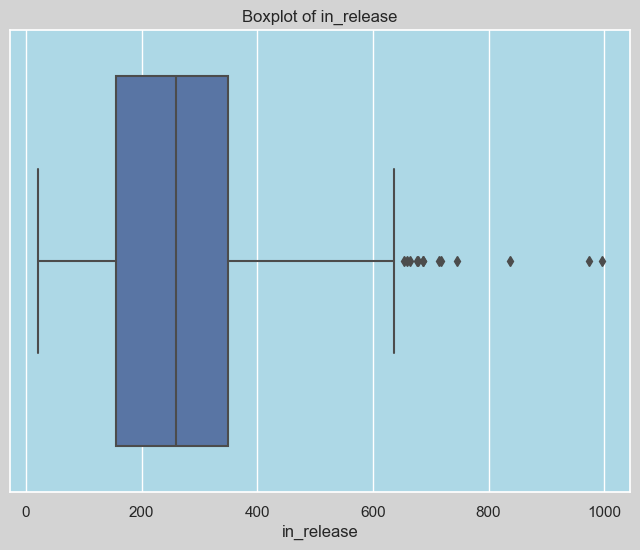


Basic Statistics for Categorical Columns:

Column: title
count               4760
unique              4676
top       Monsters, Inc.
freq                   3
Name: title, dtype: object

Column: distributor
count             4760
unique             178
top       Warner Bros.
freq               572
Name: distributor, dtype: object

Column: MPAA
count     4760
unique       8
top          R
freq      2045
Name: MPAA, dtype: object

Column: genres
count                     4760
unique                     909
top       Comedy,Drama,Romance
freq                       233
Name: genres, dtype: object

Column: release_date
count                             4760
mean     2006-12-04 22:15:19.663865600
min                1989-11-08 00:00:00
25%                1998-12-30 00:00:00
50%                2006-11-13 12:00:00
75%                2014-08-29 00:00:00
max                2022-12-23 00:00:00
Name: release_date, dtype: object


In [255]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(
    include=['object', 'bool', 'datetime64[ns]']).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {col}')
    sns.boxplot(x=df[col])
    plt.show()

# Print basic statistics for categorical columns
print("\nBasic Statistics for Categorical Columns:")
for col in categorical_cols:
    print(f'\nColumn: {col}')
    print(df[col].describe())

In [256]:
df.to_csv('./data/processed/processed_data.csv', index=False)